# Checkpoint 1: Data Cleaning 1

In [114]:
#Importing numpy and pandas modules

import numpy as np
import pandas as pd

In [115]:
#Reading the files given companies and rounds2

companies = pd.read_csv("/Users/venu/Downloads/Assignment/companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("/Users/venu/Downloads/Assignment/rounds2.csv",encoding = "ISO-8859-1")

In [116]:
#How many unique companies are present in rounds2??

rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()

print("UNIQUE COMPANIES PRESENT IN ROUNDS2:")
print({rounds2.company_permalink.nunique()})

UNIQUE COMPANIES PRESENT IN ROUNDS2:
{66368}


In [117]:
#How many unique companies are present in companies?


companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
companies["permalink"] = companies["permalink"].str.lower()

print("UNIQUE COMPANIES PRESENT IN COMPANIES:")
print( {companies.permalink.nunique()} )

UNIQUE COMPANIES PRESENT IN COMPANIES:
{66368}


# In the companies data frame, which column can be used as the unique key for each company? 
## Write the name of the column.

### permalink

In [118]:
#Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

round2_companies = pd.DataFrame(rounds2.company_permalink.unique())
companies_companies = pd.DataFrame(companies.permalink.unique())
if companies_companies.equals(round2_companies):
     print('NO: BOTH ARE HAVING SAME COMPANIES')
else:
    print('YES: THERE ARE SOME DIFFERENT COMPANIES')

NO: BOTH ARE HAVING SAME COMPANIES


In [119]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.
#Name the merged frame master_frame.
#How many observations are present in master_frame?
master_frame=pd.merge(rounds2,companies,left_on="company_permalink",right_on="permalink",how="left")

print("OBSERVATIONS PRESENT IN MASTER_FRAME ARE:")
print(master_frame.shape)


OBSERVATIONS PRESENT IN MASTER_FRAME ARE:
(114949, 16)


# SOME OBSERVATIONS FROM MASTER FRAME

In [120]:
#print(master_frame.isnull().sum())
#print(master_frame.isnull().any())
#print(master_frame.isnull().any(axis=1))
#print(master_frame.isnull().all(axis=1).sum())
#print(master_frame.isnull().sum(axis=1))
#print(round(100*(master_frame.isnull().sum()/len(master_frame.index)),2))
#master_frame.head(10)
#master_frame['raised_amount_usd'].describe()
#master_frame.tail(10)
#master_frame.info()

# Checkpoint 2: Funding Type Analysis

In [121]:
#Average funding amount of seed type
seed=master_frame.loc[(master_frame.funding_round_type=='seed')]


seedavg=seed['raised_amount_usd'].mean()

print("average funding amount of seed type: ",round(seedavg,4))

average funding amount of seed type:  719817.9969


In [122]:
#Average funding amount of angel type

angel=master_frame.loc[(master_frame.funding_round_type=='angel')]
avgangel=angel['raised_amount_usd'].mean()

print("average funding amount of angel type: ",round(avgangel,4))

average funding amount of angel type:  958694.4698


In [123]:
#Average funding amount of venture type

venture=master_frame.loc[(master_frame.funding_round_type=='venture')]
venavg=venture['raised_amount_usd'].mean()

print("average funding amount of venture type: ",round(venavg,4))



average funding amount of venture type:  11748949.1295


In [124]:
#Average funding amount of private equity type
private=master_frame.loc[(master_frame.funding_round_type=='private_equity')]

privavg=private['raised_amount_usd'].mean()

print("average funding amount of private equity type: ",round(privavg,4))

average funding amount of private equity type:  73308593.0294


# Checkpoint 3: Country Analysis

In [125]:
#Top9
countries=venture.groupby(['country_code'])

countriesdf=pd.DataFrame(countries['raised_amount_usd'].sum().sort_values(ascending=False))
top9=countriesdf[0:9]
print(top9.head(10))

print("top 3 english speaking countries to invest: USA, GBR, IND")


              raised_amount_usd
country_code                   
USA                4.225108e+11
CHN                3.983542e+10
GBR                2.024563e+10
IND                1.439186e+10
CAN                9.583332e+09
FRA                7.259537e+09
ISR                6.907515e+09
DEU                6.346960e+09
JPN                3.363677e+09
top 3 english speaking countries to invest: USA, GBR, IND


# Checkpoint 4: Sector Analysis 1

In [126]:
# Generating a Primary Sector Column
master_frame['primary sector'] = 0
master_frame['primary sector'] = master_frame['category_list'].str.split('|', expand=True) 
#master_frame.head(10)
print(master_frame.columns)


Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at', 'primary sector'],
      dtype='object')


In [127]:
# Reading mapping.csv

mapping=pd.read_csv("/Users/venu/Downloads/Assignment/mapping.csv",encoding = "ISO-8859-1")

#Mapping category list to master category
#correcting improperly decoded words from mapping.csv

mapping = mapping.melt(id_vars="category_list",var_name="master_category")
mapping = mapping.loc[~(mapping["value"]==0) ]
mapping=mapping.drop(columns="value")
mapping['category_list'] = mapping['category_list'].str.replace('0', 'na')
mapping.head(10)
#mapping.tail(10)

,category_list,master_category
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
57,Bicycles,Automotive & Sports
69,Boating Industry,Automotive & Sports
87,CAD,Automotive & Sports
93,Cars,Automotive & Sports
188,Design,Automotive & Sports


In [128]:
#Creating dictionary from mapping based on category_list and master_category

mappingdict=dict(zip(mapping['category_list'],mapping['master_category']))

# MAPPING PRIMARY SECTOR WITH MAIN SECTOR

master_frame['main sector']=master_frame['primary sector'].map(mappingdict)

#master_frame.head(20)             
master_frame[['category_list','primary sector', 'main sector']].head(10)
#master_frame[['category_list','primary sector', 'main sector']].tail(20)

,category_list,primary sector,main sector
0,Media,Media,Entertainment
1,Application Platforms|Real Time|Social Network...,Application Platforms,"News, Search and Messaging"
2,Application Platforms|Real Time|Social Network...,Application Platforms,"News, Search and Messaging"
3,Apps|Games|Mobile,Apps,"News, Search and Messaging"
4,Curated Web,Curated Web,"News, Search and Messaging"
5,Software,Software,Others
6,Games,Games,Entertainment
7,Biotechnology,Biotechnology,Cleantech / Semiconductors
8,Biotechnology,Biotechnology,Cleantech / Semiconductors
9,Analytics,Analytics,"Social, Finance, Analytics, Advertising"


# Checkpoint 5: Sector Analysis 2

In [129]:

#USA
D1 = master_frame.loc[(master_frame['country_code']=='USA')&(master_frame['funding_round_type']=='venture')]
D1=D1.loc[(D1['raised_amount_usd']>5000000)&(D1['raised_amount_usd']<15000000+1)]

#GBR
D2 = master_frame.loc[(master_frame['country_code']=='GBR')&(master_frame['funding_round_type']=='venture')]
D2=D2.loc[(D2['raised_amount_usd']>5000000)&(D2['raised_amount_usd']<15000000+1)]

#IND
D3 = master_frame.loc[(master_frame['country_code']=='IND')&(master_frame['funding_round_type']=='venture')]
D3=D3.loc[(D3['raised_amount_usd']>5000000)&(D3['raised_amount_usd']<15000000+1)]

In [130]:
#USA
#1. USA Total number of investments (count)

print("******************")
print("USA Total number of investments: ")
print(D1['raised_amount_usd'].count())

#2. USA Total amount of investment (USD)

print("******************")
print("USA Total amount of investment: ")
print(D1['raised_amount_usd'].sum())

#3. USA Top sector (based on count of investments)
#4. USA Second-best sector (based on count of investments)
#5. USA Third-best sector (based on count of investments)

print("******************")
print("USA Sector wise investments: ")
print(D1['main sector'].value_counts())

#6. USA Number of investments in the top sector (refer to point 3)

print("******************")
print("USA Top 1 Sector investments: ")
usatopsec=D1.loc[D1['main sector']=='Others']

print(usatopsec['main sector'].count())

#7. USA Number of investments in the second-best sector (refer to point 4)
usasecsec=D1.loc[D1['main sector']=='Social, Finance, Analytics, Advertising']

print("******************")
print("USA Top 2 Sector investments: ")
print(usasecsec['main sector'].count())

#8. USA Number of investments in the third-best sector (refer to point 5)

usathisec=D1.loc[D1['main sector']=='Cleantech / Semiconductors']

print("******************")
print("USA Top 3 Sector investments: ")
print(usathisec['main sector'].count())

#9. USA For the top sector count-wise (point 3), which company received the highest investment?

usone=usatopsec.groupby('permalink')

print("******************")
print("USA Top 1 Company investments: ")
print(usone['raised_amount_usd'].sum().sort_values(ascending=False).head(1))

#10.USA For the second-best sector count-wise (point 4), which company received the highest investment?

ustwo=usasecsec.groupby('permalink')
print("******************")
print("USA Top 2 Company investments: ")
print(ustwo['raised_amount_usd'].sum().sort_values(ascending=False).head(1))

******************
USA Total number of investments: 
10896
******************
USA Total amount of investment: 
102261347515.0
******************
USA Sector wise investments: 
Others                                     2618
Social, Finance, Analytics, Advertising    2408
Cleantech / Semiconductors                 2117
News, Search and Messaging                 1403
Health                                      820
Manufacturing                               740
Entertainment                               521
Automotive & Sports                         148
Blanks                                       76
Name: main sector, dtype: int64
******************
USA Top 1 Sector investments: 
2618
******************
USA Top 2 Sector investments: 
2408
******************
USA Top 3 Sector investments: 
2117
******************
USA Top 1 Company investments: 
permalink
/organization/virtustream    59300000.0
Name: raised_amount_usd, dtype: float64
******************
USA Top 2 Company investments: 
perm

In [131]:
#GBR


#1. GBR Total number of investments (count)
print("******************")
print("GBR Total number of investments: ")
print(D2['raised_amount_usd'].count())

#2. GBR Total amount of investment (USD)
print("******************")
print("GBR Total amount of investment: ")
print(D2['raised_amount_usd'].sum())

#3. GBR Top sector (based on count of investments)
#4. GBR Second-best sector (based on count of investments)
#5. GBR Third-best sector (based on count of investments)

print("******************")
print("GBR Sector wise investments: ")
print(D2['main sector'].value_counts())


#6. GBR Number of investments in the top sector (refer to point 3)
gbrtopsec=D2.loc[D2['main sector']=='Others']
print("******************")
print("GBR Top 1 Sector investments: ")
print(gbrtopsec['main sector'].count())

#7. GBR Number of investments in the second-best sector (refer to point 4)
gbrsecsec=D2.loc[D2['main sector']=='Cleantech / Semiconductors']
print("******************")
print("GBR Top 2 Sector investments: ")
print(gbrsecsec['main sector'].count())

#8. GBR Number of investments in the third-best sector (refer to point 5)
gbrthisec=D2.loc[D2['main sector']=='Social, Finance, Analytics, Advertising']
print("******************")
print("GBR Top 3 Sector investments: ")
print(gbrthisec['main sector'].count())
 
#9. GBR For the top sector count-wise (point 3), which company received the highest investment?
gbone=gbrtopsec.groupby('permalink')
print("******************")
print("GBR Top 1 Company investments: ")
print(gbone['raised_amount_usd'].sum().sort_values(ascending=False).head(1))

#10.GBR For the second-best sector count-wise (point 4), which company received the highest investment?
gbtwo=gbrsecsec.groupby('permalink')
print("******************")
print("GBR Top 2 Company investments: ")
print(gbtwo['raised_amount_usd'].sum().sort_values(ascending=False).head(1))


******************
GBR Total number of investments: 
586
******************
GBR Total amount of investment: 
5226843539.0
******************
GBR Sector wise investments: 
Others                                     136
Cleantech / Semiconductors                 126
Social, Finance, Analytics, Advertising    122
News, Search and Messaging                  66
Entertainment                               50
Manufacturing                               39
Health                                      23
Automotive & Sports                         16
Blanks                                       6
Name: main sector, dtype: int64
******************
GBR Top 1 Sector investments: 
136
******************
GBR Top 2 Sector investments: 
126
******************
GBR Top 3 Sector investments: 
122
******************
GBR Top 1 Company investments: 
permalink
/organization/electric-cloud    37000000.0
Name: raised_amount_usd, dtype: float64
******************
GBR Top 2 Company investments: 
permalink
/organi

In [132]:
#IND

#1. IND Total number of investments (count)

print("******************")
print("IND Total number of investments: ")

print(D3['raised_amount_usd'].count())

#2. IND Total amount of investment (USD)
print("******************")
print("IND Total amount of investment: ")
print(D3['raised_amount_usd'].sum())

#3. IND Top sector (based on count of investments)
#4. IND Second-best sector (based on count of investments)
#5. IND Third-best sector (based on count of investments)

print("******************")
print("IND Sector wise investments: ")
print(D3['main sector'].value_counts())

#6. IND Number of investments in the top sector (refer to point 3)
indtopsec=D3.loc[D3['main sector']=='Others']
print("******************")
print("IND Top 1 Sector investments: ")
print(indtopsec['main sector'].count())

#7. IND Number of investments in the second-best sector (refer to point 4)
indsecsec=D3.loc[D3['main sector']=='Social, Finance, Analytics, Advertising']
print("******************")
print("IND Top 2 Sector investments: ")
print(indsecsec['main sector'].count())

#8. IND Number of investments in the third-best sector (refer to point 5)
indthisec=D3.loc[D3['main sector']=='News, Search and Messaging']
print("******************")
print("IND Top 3 Sector investments: ")
print(indthisec['main sector'].count())


#9. IND For the top sector count-wise (point 3), which company received the highest investment?
indone=indtopsec.groupby('permalink')
print("******************")
print("IND Top 1 Company investments: ")
print(indone['raised_amount_usd'].sum().sort_values(ascending=False).head(1))


#10.IND For the second-best sector count-wise (point 4), which company received the highest investment?

indtwo=indsecsec.groupby('permalink')
print("******************")
print("IND Top 2 Company investments: ")
print(indtwo['raised_amount_usd'].sum().sort_values(ascending=False).head(1))

******************
IND Total number of investments: 
280
******************
IND Total amount of investment: 
2726543602.0
******************
IND Sector wise investments: 
Others                                     93
Social, Finance, Analytics, Advertising    54
News, Search and Messaging                 42
Entertainment                              26
Manufacturing                              20
Health                                     17
Cleantech / Semiconductors                 15
Automotive & Sports                        11
Blanks                                      2
Name: main sector, dtype: int64
******************
IND Top 1 Sector investments: 
93
******************
IND Top 2 Sector investments: 
54
******************
IND Top 3 Sector investments: 
42
******************
IND Top 1 Company investments: 
permalink
/organization/firstcry-com    39000000.0
Name: raised_amount_usd, dtype: float64
******************
IND Top 2 Company investments: 
permalink
/organization/manthan

# Checkpoint 6: Plots

plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

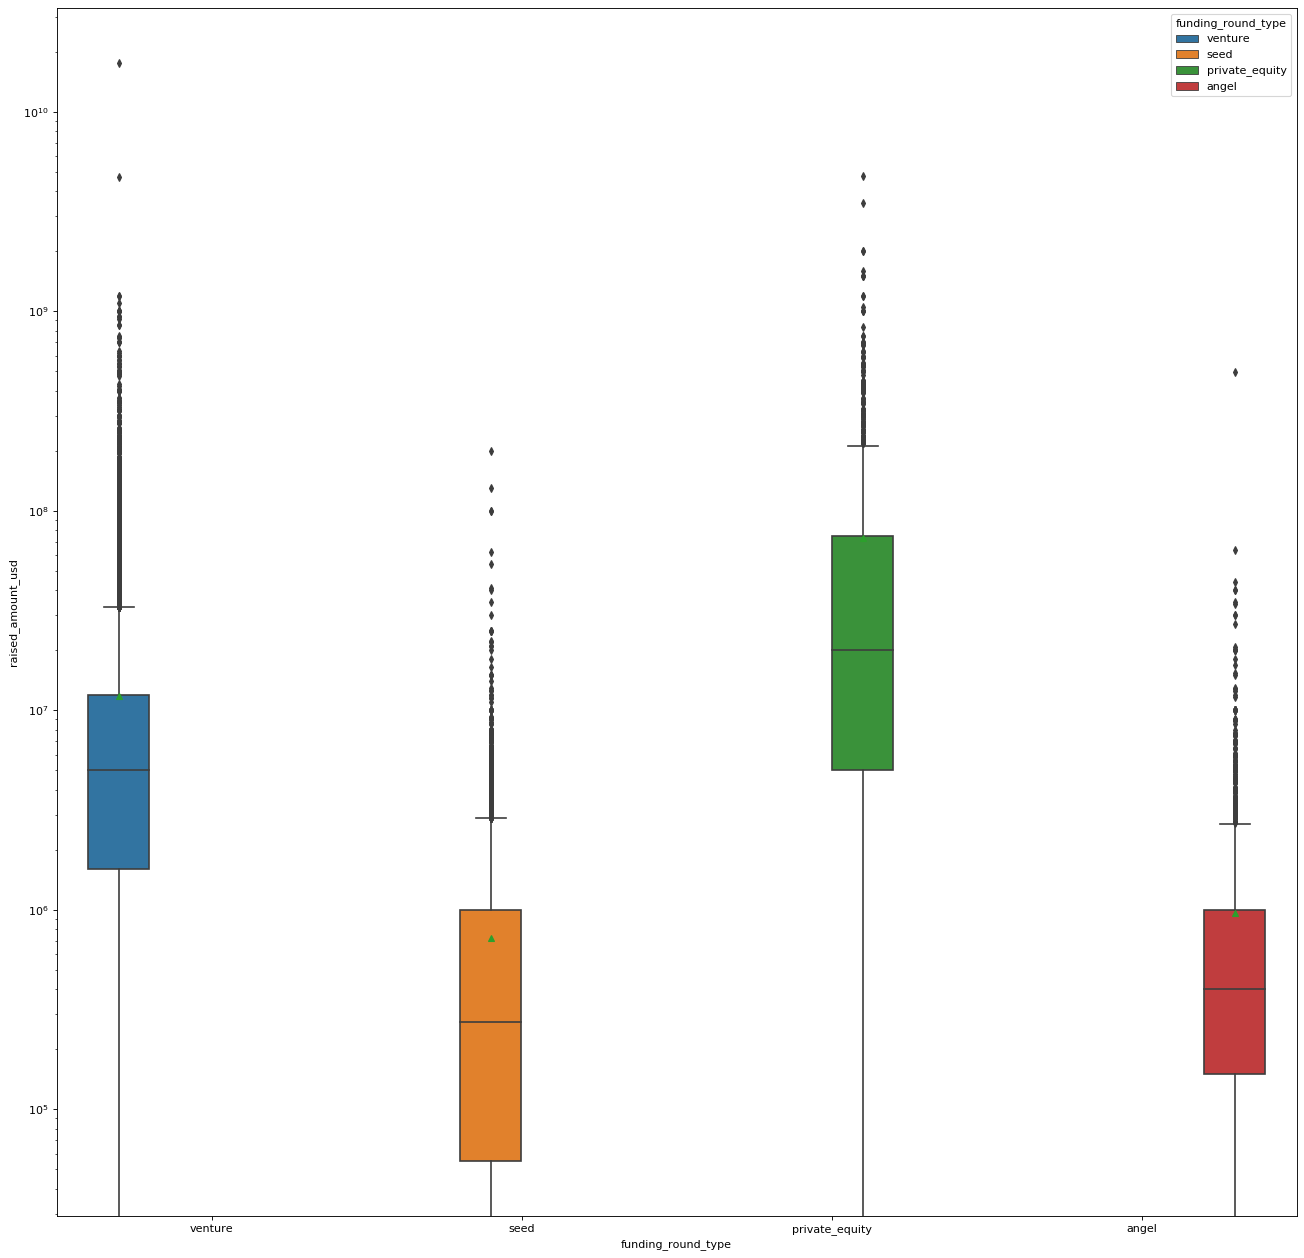

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
ft=master_frame.loc[(master_frame['funding_round_type']=='venture')|(master_frame['funding_round_type']=='seed')|(master_frame['funding_round_type']=='angel')|(master_frame['funding_round_type']=='private_equity')]
amount_per_type = ft.groupby('funding_round_type').agg({'raised_amount_usd': 'sum'})
avg_per_type = ft.groupby('funding_round_type').agg({'raised_amount_usd': 'mean'})
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.yscale('log')
# specify hue="categorical_variable"
sns.boxplot(x='funding_round_type', y='raised_amount_usd',hue= 'funding_round_type',data=ft,showmeans=True,whis=2)
plt.show()


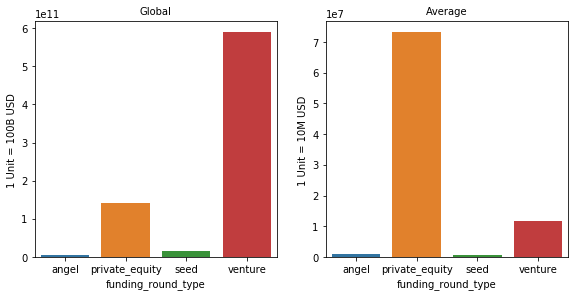

Total funding amount in all 4 types of rounds in millions:
                    raised_amount_usd
funding_round_type                   
angel                     4659.255123
private_equity          141925.436105
seed                     16989.864181
venture                 590126.216876
**************************************
Average of funding amount in all 4 types of rounds in millions:
                    raised_amount_usd
funding_round_type                   
angel                        0.958694
private_equity              73.308593
seed                         0.719818
venture                     11.748949


In [134]:
fund_type=master_frame.loc[(master_frame['funding_round_type']=='venture')|(master_frame['funding_round_type']=='seed')|(master_frame['funding_round_type']=='angel')|(master_frame['funding_round_type']=='private_equity')]
amount_per_type = fund_type.groupby('funding_round_type').agg({'raised_amount_usd': 'sum'})
avg_per_type = fund_type.groupby('funding_round_type').agg({'raised_amount_usd': 'mean'})
plt.figure(figsize=(20, 20))
ax1 = plt.subplot(4, 4, 3)
ax2 = plt.subplot(4, 4, 4)
ax1.set_title('Global',fontsize =10)
ax2.set_title('Average',fontsize =10)
ax1.set_ylabel('1 Unit = 100B USD ')
ax2.set_ylabel('1 Unit = 10M USD ')
sns.barplot(x=amount_per_type.index, y=amount_per_type.values.flatten(), ax=ax1)
sns.barplot(x=avg_per_type.index, y=avg_per_type.values.flatten(), ax=ax2)
plt.show()

print("Total funding amount in all 4 types of rounds in millions:")
print((amount_per_type)/1000000)
print("**************************************")
print("Average of funding amount in all 4 types of rounds in millions:")
print((avg_per_type)/1000000)

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

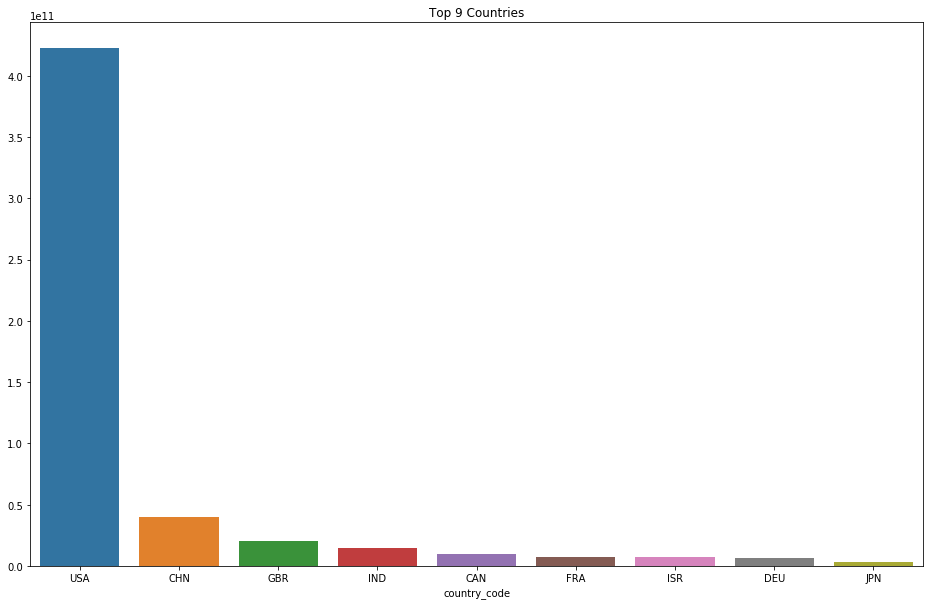

In [135]:
#top9 = master_frame[master_frame['funding_round_type']=='venture'].groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False).head(9)

plt.figure(figsize=(16, 10))
sns.barplot(x=top9.index, y=top9.values.flatten())
plt.title("Top 9 Countries")
plt.show()

### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

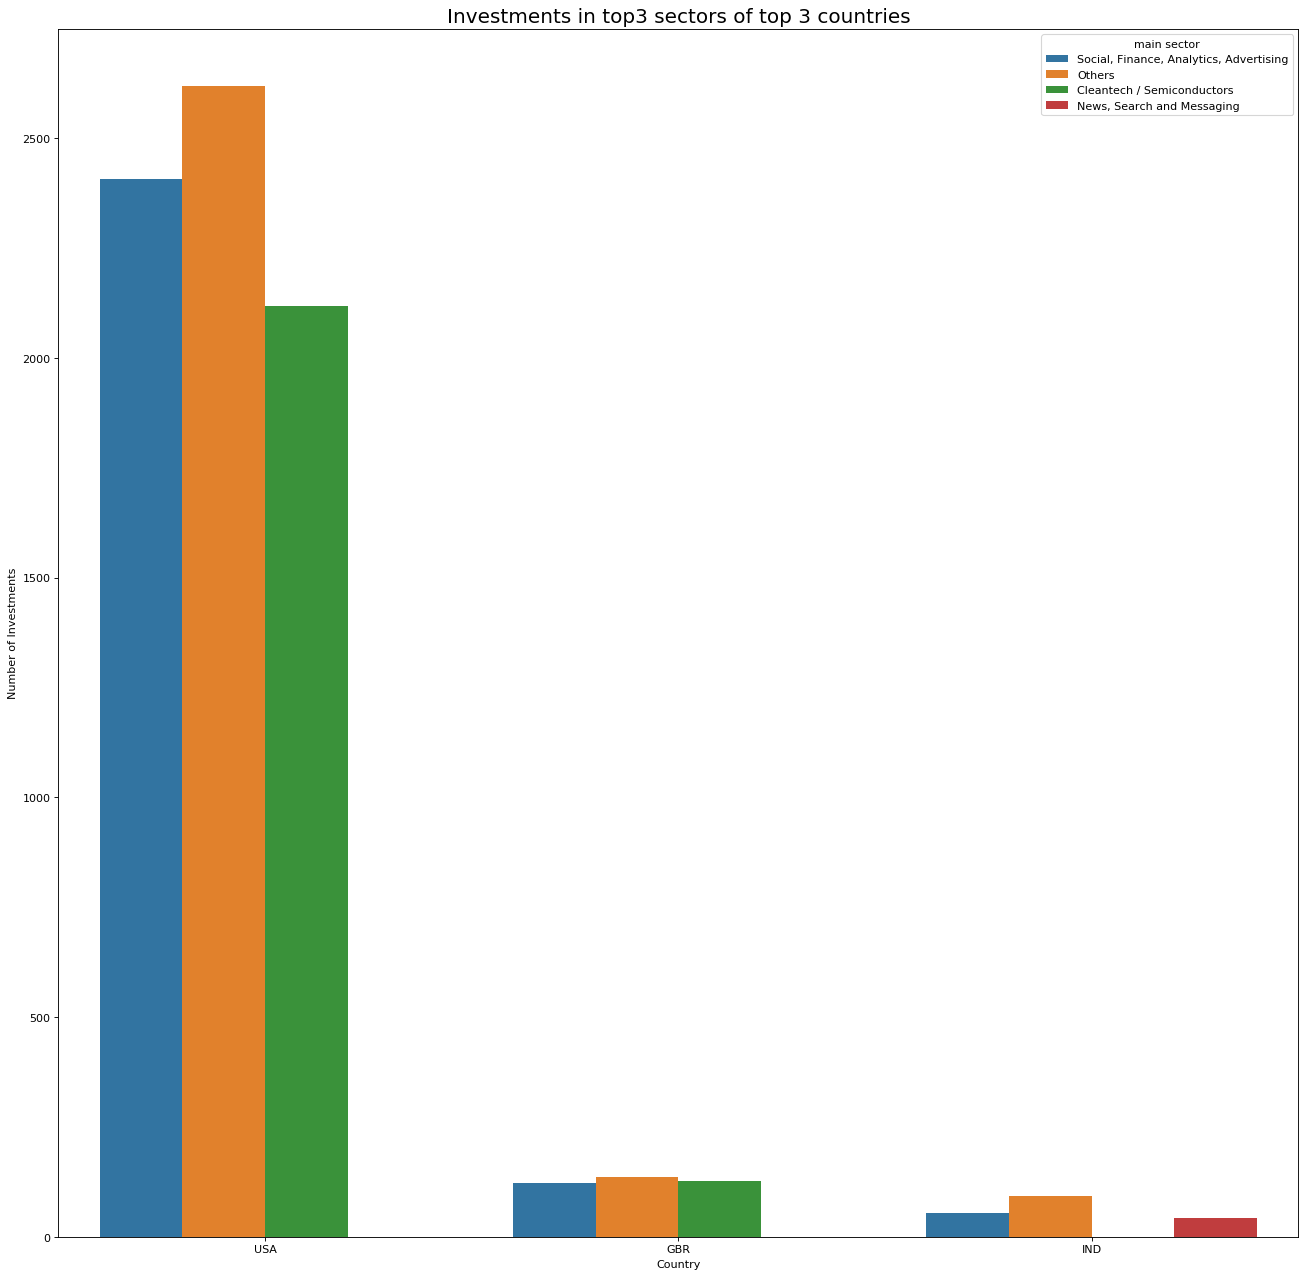

In [136]:
top3=D1[D1['main sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
top3=top3.append(D2[D2['main sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])], ignore_index=True)
top3=top3.append(D3[D3['main sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)


# set figure size for larger figure
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main sector", data=top3,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()